# Analyzing Road Accidents for a Safer Tomorrow

# Introduction:
Road safety is a crucial concern in the UK, with thousands of accidents reported annually. This project leverages traffic accident data to identify patterns and factors influencing road safety. By uncovering hidden trends, we aim to assist in developing targeted strategies for reducing road accidents.

# Problem Statement:
Despite ongoing safety initiatives, road accidents remain frequent across the UK, particularly in urban hotspots and during certain seasons. The project addresses the problem:How can accident data be used to identify key factors and timeframes contributing to road accidents and improve safety through data driven decisions?

# Objectives:

Identify peak times and conditions for road accidents.

Analyze the impact of environmental and infrastructure variables.

Compare accident patterns in urban vs rural areas.

Recommend improvements for road safety planning and awareness.

# Target Audience:

Urban and transport planners

Government transportation departments

General public and road users

# Dataset:

Source: Kaggle - 2012–2014 Traffic Flow Dataset

Data Dictionary Includes:

Accident_Index, Date, Time, Road_Type, Urban_or_Rural_Area, Weather_Conditions, Light_Conditions, Number_of_Vehicles, Number_of_Casualties, etc.

Data Types: Mixed types (DateTime, Categorical, Numerical)

# Analyzing

## Install importent libraries

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv file

In [347]:
accidents_df = pd.read_csv("accidents_2012_to_2014.csv", low_memory=False)


## View Data

In [349]:
accidents_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037,597647,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
464693,2.01E+12,321509,574063,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
464694,2.01E+12,321337,566365,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,NaN,NaN,2,Yes,NaN,2014
464695,2.01E+12,323869,566853,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,NaN,NaN,2,Yes,NaN,2014


In [350]:
accidents_df.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [351]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [439]:
accidents_df["Number_of_Casualties"].unique()

array([ 1,  2,  4,  3,  6,  5,  7,  9,  8, 11, 10, 12, 13, 42, 16, 14, 25,
       33, 38, 24, 29, 19, 26, 17, 18, 87, 41, 93, 27], dtype=int64)

In [353]:
accidents_df["Carriageway_Hazards"].unique()

array([nan, 'Other object in carriageway',
       'Any animal (except a ridden horse)',
       'Pedestrian in carriageway (not injured)',
       'Dislodged vehicle load in carriageway',
       'Involvement with previous accident'], dtype=object)

In [354]:
accidents_df["Number_of_Vehicles"].max()

67

## Cleaning Data

### Drop unnecessary columns

In [357]:
accidents_df = accidents_df.drop(columns=['Day_of_Week','Carriageway_Hazards','Location_Easting_OSGR', 'Location_Northing_OSGR','Junction_Detail','Junction_Control','Special_Conditions_at_Site','LSOA_of_Accident_Location'])

### Drop the duplicates

In [359]:
accidents_df = accidents_df.drop_duplicates(subset='Accident_Index')

### Drop the nulls

In [361]:
accidents_df = accidents_df.dropna(subset=['Road_Surface_Conditions'])

In [362]:
accidents_df = accidents_df.dropna(subset=['Did_Police_Officer_Attend_Scene_of_Accident'])

In [363]:
null_counts = accidents_df.isnull().sum()
print(null_counts)

Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions  

### Format the data type

In [365]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263295 entries, 0 to 464386
Data columns (total 25 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               263295 non-null  object 
 1   Longitude                                    263295 non-null  float64
 2   Latitude                                     263295 non-null  float64
 3   Police_Force                                 263295 non-null  int64  
 4   Accident_Severity                            263295 non-null  int64  
 5   Number_of_Vehicles                           263295 non-null  int64  
 6   Number_of_Casualties                         263295 non-null  int64  
 7   Date                                         263295 non-null  object 
 8   Time                                         263295 non-null  object 
 9   Local_Authority_(District)                   263295 non-null  in

In [388]:
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'], errors='coerce')


In [390]:
#convert Date type to datetime
accidents_df.loc[:, 'Date'] = pd.to_datetime(accidents_df['Date'], format='%d/%m/%Y')

In [392]:
#add month column 
accidents_df.loc[:, 'Month'] = accidents_df['Date'].dt.month_name()

In [394]:
accidents_df.loc[:,'day']=accidents_df['Date'].dt.day

In [396]:
accidents_df.loc[:,'Day_Name'] = accidents_df['Date'].dt.day_name()

In [382]:
accidents_df

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Time,Local_Authority_(District),...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,201201BS70001,-0.169101,51.493429,1,3,2,1,2012-01-19 00:00:00,1900-01-01 20:35:00,12,...,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,201201BS70002,-0.200838,51.517931,1,3,2,1,2012-01-04 00:00:00,1900-01-01 17:00:00,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,201201BS70003,-0.188636,51.487618,1,3,2,1,2012-01-10 00:00:00,1900-01-01 10:07:00,12,...,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,201201BS70004,-0.200259,51.514325,1,3,1,1,2012-01-18 00:00:00,1900-01-01 12:20:00,12,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,201201BS70005,-0.183773,51.497614,1,3,1,1,2012-01-17 00:00:00,1900-01-01 20:24:00,12,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464382,201497UD08210,-4.629349,55.458042,97,3,2,1,2014-10-31 00:00:00,1900-01-01 12:20:00,937,...,3,79,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2014
464383,201497UD20401,-4.993545,55.043813,97,3,2,1,2014-01-16 00:00:00,1900-01-01 07:15:00,937,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes,2014
464384,201497UD20501,-5.002705,55.035460,97,3,1,1,2014-01-16 00:00:00,1900-01-01 16:25:00,937,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes,2014
464385,201497UD20601,-4.976987,55.080604,97,3,1,1,2014-01-17 00:00:00,1900-01-01 18:32:00,937,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes,2014


## Geographic patterns

In [398]:
top_areas = accidents_df['Local_Authority_(District)'].value_counts().head(10)
print(top_areas)

Local_Authority_(District)
300    7289
1      4653
596    3901
926    3629
9      3501
215    3340
91     3337
102    3161
30     2996
169    2971
Name: count, dtype: int64


In [400]:


lookup_df = pd.read_csv(r"C:\Users\Asma Ameen\Downloads\Local_Authority_Districts_(December_2024)_Names_and_Codes_in_the_UK.csv")
accidents_df['Local_Authority_(Highway)'] = accidents_df['Local_Authority_(Highway)'].astype(str)
lookup_df['LAD24CD'] = lookup_df['LAD24CD'].astype(str)
merged_df = accidents_df.merge(lookup_df[['LAD24CD', 'LAD24NM']],left_on='Local_Authority_(Highway)',right_on='LAD24CD',how='left')
merged_df.rename(columns={'LAD24NM': 'District_Name'}, inplace=True)
merged_df.drop(columns=['LAD24CD'], inplace=True)


print(merged_df[['Local_Authority_(Highway)', 'District_Name']].head())




  Local_Authority_(Highway)           District_Name
0                 E09000020  Kensington and Chelsea
1                 E09000033             Westminster
2                 E09000020  Kensington and Chelsea
3                 E09000020  Kensington and Chelsea
4                 E09000020  Kensington and Chelsea


In [401]:
null_percentages = merged_df.isnull().mean()*100
null_percentages

Accident_Index                                  0.000000
Longitude                                       0.000000
Latitude                                        0.000000
Police_Force                                    0.000000
Accident_Severity                               0.000000
Number_of_Vehicles                              0.000000
Number_of_Casualties                            0.000000
Date                                            0.000000
Time                                            0.000000
Local_Authority_(District)                      0.000000
Local_Authority_(Highway)                       0.000000
1st_Road_Class                                  0.000000
1st_Road_Number                                 0.000000
Road_Type                                       0.000000
Speed_limit                                     0.000000
2nd_Road_Class                                  0.000000
2nd_Road_Number                                 0.000000
Pedestrian_Crossing-Human_Contr

In [404]:
merged_df[['Local_Authority_(Highway)','District_Name','Year']]

,Local_Authority_(Highway),District_Name,Year
0,E09000020,Kensington and Chelsea,2012
1,E09000033,Westminster,2012
2,E09000020,Kensington and Chelsea,2012
3,E09000020,Kensington and Chelsea,2012
4,E09000020,Kensington and Chelsea,2012
...,...,...,...
263290,S12000028,South Ayrshire,2014
263291,S12000028,South Ayrshire,2014
263292,S12000028,South Ayrshire,2014
263293,S12000028,South Ayrshire,2014


In [406]:
traffic_accidents_df = merged_df.dropna(subset=['District_Name'])

In [408]:
null_counts =traffic_accidents_df .isnull().sum()
null_counts

Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions  

### heatmap

## Accident Vs Date

C:\Users\Asma Ameen\AppData\Local\Temp\ipykernel_3152\2807852825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_days, x='Date', y='Accident_Count', palette='Reds_r')


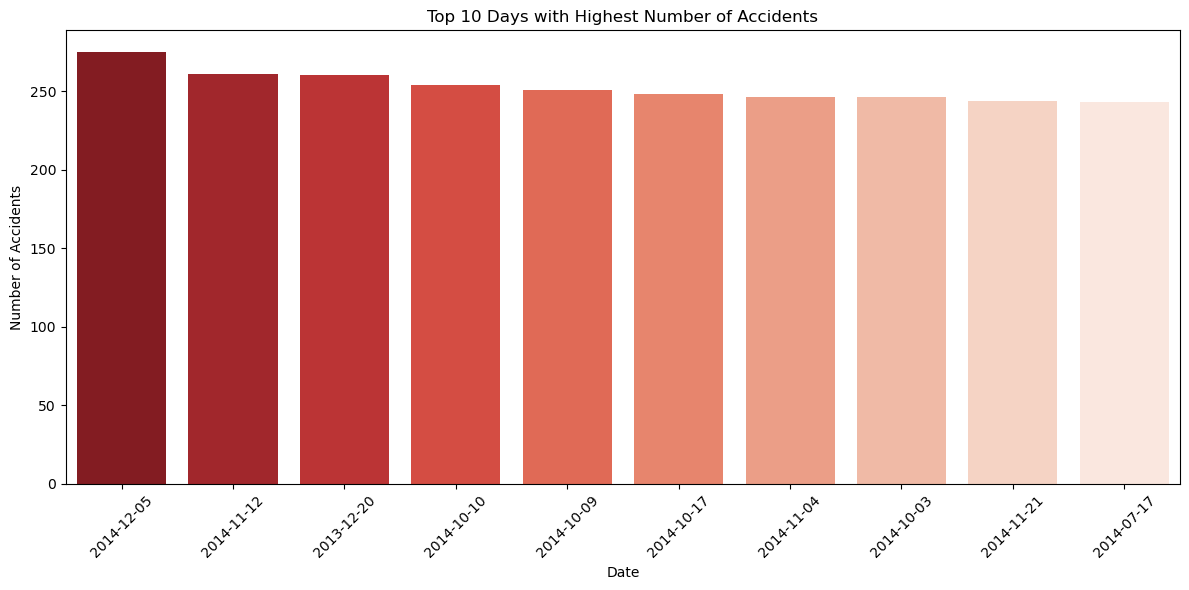

In [412]:
daily_counts = traffic_accidents_df.groupby('Date').size().reset_index(name='Accident_Count')
top_days = daily_counts.sort_values(by='Accident_Count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_days, x='Date', y='Accident_Count', palette='Reds_r')
plt.title("Top 10 Days with Highest Number of Accidents")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [414]:
traffic_accidents_df['Hour'] = traffic_accidents_df['Time'].dt.hour

C:\Users\Asma Ameen\AppData\Local\Temp\ipykernel_3152\2576467166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_accidents_df['Hour'] = traffic_accidents_df['Time'].dt.hour


In [416]:
hourly_counts = traffic_accidents_df['Hour'].value_counts().sort_index()

C:\Users\Asma Ameen\AppData\Local\Temp\ipykernel_3152\4119269981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='magma')


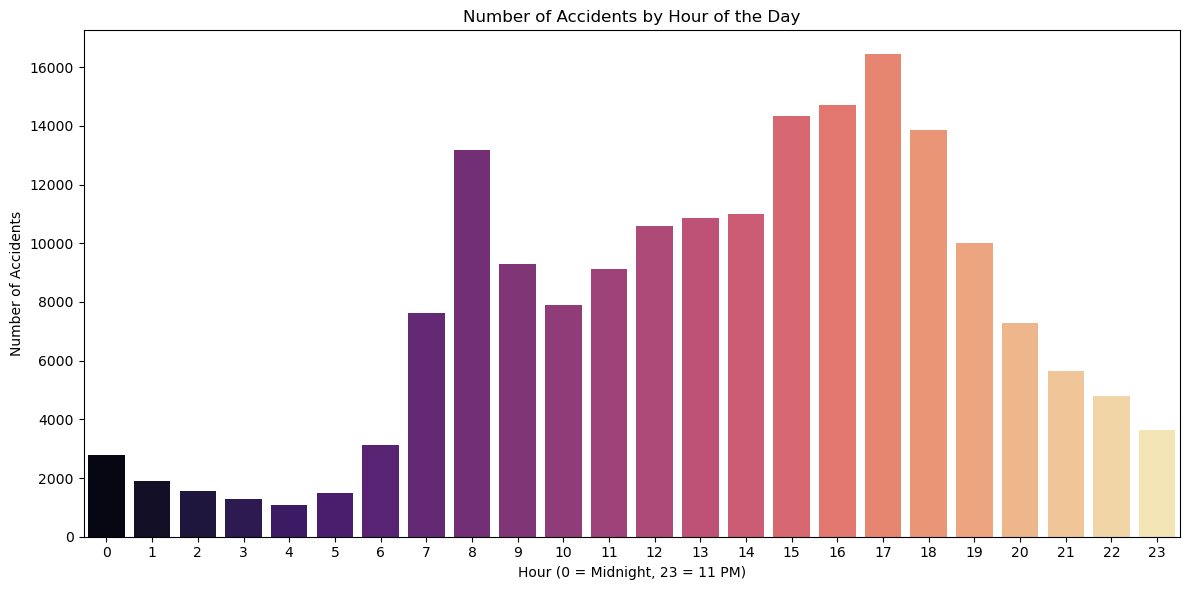

In [418]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='magma')
plt.title("Number of Accidents by Hour of the Day")
plt.xlabel("Hour (0 = Midnight, 23 = 11 PM)")
plt.ylabel("Number of Accidents")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Recommendations:

Deploy targeted campaigns in peak months (autumn)

Enhance street lighting and road signage in urban zones

Improve drainage and winter road maintenance

Introduce smart traffic systems in high risk locations

# Limitations and Assumptions:

Analysis focuses on 2012–2014 for deeper exploration despite full data range

Assumes accurate reporting of road and weather conditions

Missing time entries and unspecified roads not deeply analyzed

Does not account for changes in population density or traffic volume trends

# References:

Kaggle Dataset: https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales

UK Government Road Safety Publications

Power BI Documentation

Data cleaning (Pandas)